In [42]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [38]:
#pip install xlrd


In [43]:
#importing data
df=pd.read_excel('Bond Funds(1).xls')
df.head()

,Fund Number,Type,Assets,Fees,Expense Ratio,Return 2009,3-Year Return,5-Year Return,Risk,Bins,Midpoints
0,FN-1,Intermediate Government,7268.1,No,0.45,6.9,6.9,5.5,Below average,-10.01,-7.5
1,FN-2,Intermediate Government,475.1,No,0.50,9.8,7.5,6.1,Below average,-5.01,-2.5
2,FN-3,Intermediate Government,193.0,No,0.71,6.3,7.0,5.6,Average,-0.01,2.5
3,FN-4,Intermediate Government,18603.5,No,0.13,5.4,6.6,5.5,Average,4.99,7.5
4,FN-5,Intermediate Government,142.6,No,0.60,5.9,6.7,5.4,Average,9.99,12.5


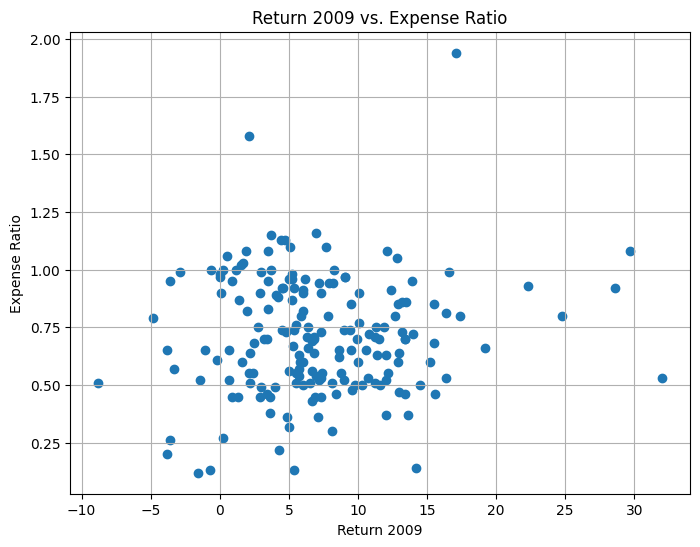

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Return 2009'], df['Expense Ratio']) 
  # x-axis: Return, y-axis: Expense Ratio
plt.xlabel('Return 2009')
plt.ylabel('Expense Ratio')
plt.title('Return 2009 vs. Expense Ratio')
plt.grid(True)
plt.show()

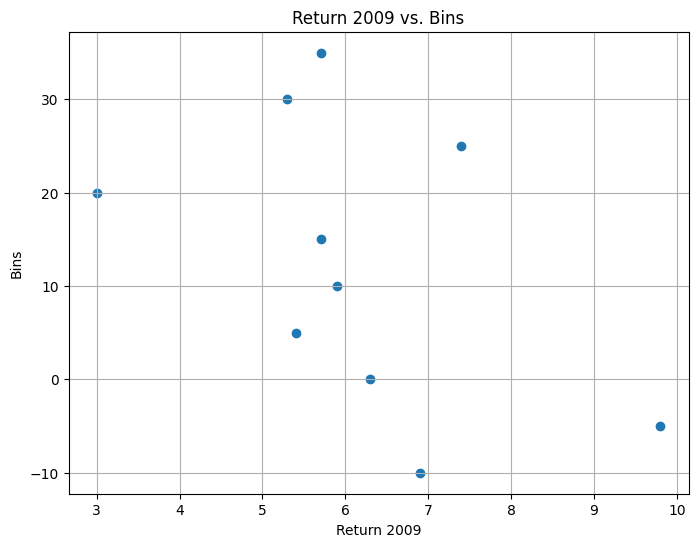

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Return 2009'], df['Bins'])  # x-axis: Return, y-axis: Expense Ratio
plt.xlabel('Return 2009')
plt.ylabel('Bins')
plt.title('Return 2009 vs. Bins')
plt.grid(True)
plt.show()

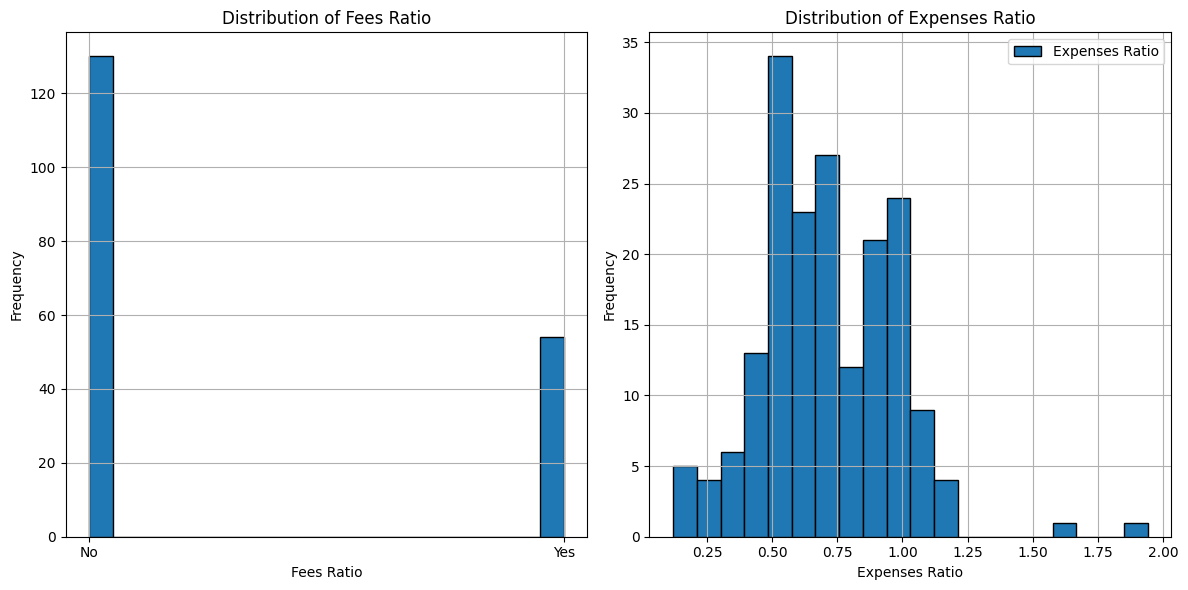

In [46]:
fees_data = df['Fees']
expenses_data = df['Expense Ratio']

# Create histograms (adjust the number of bins as needed)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Create subplot for Fees histogram
plt.hist(fees_data, bins=20, edgecolor='black', label='Fees')
plt.xlabel('Fees Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Fees Ratio')
plt.grid(True)

plt.subplot(1, 2, 2)  # Create subplot for Expenses histogram
plt.hist(expenses_data, bins=20, edgecolor='black', label='Expenses Ratio')
plt.xlabel('Expenses Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Expenses Ratio')
plt.grid(True)

plt.legend()  # Add legend for both histograms
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

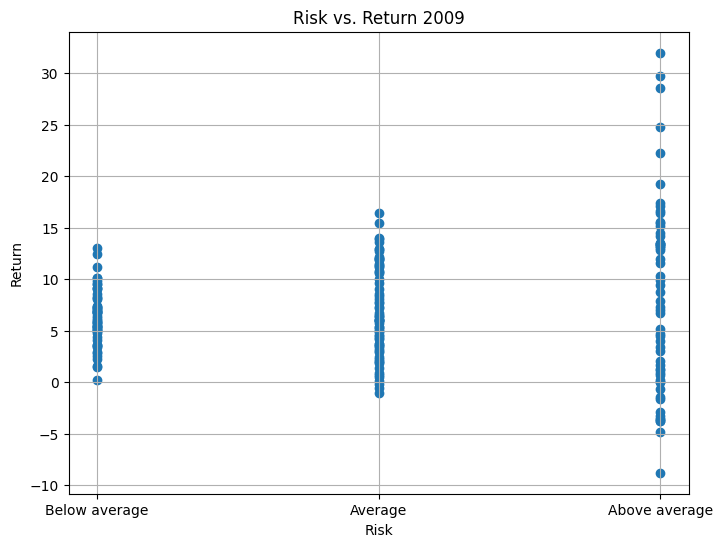

In [47]:
return_data = df['Return 2009']
risk_data = df['Risk']

plt.figure(figsize=(8, 6))
plt.scatter(risk_data, return_data)  # x-axis: Risk, y-axis: Return
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Risk vs. Return 2009')
plt.grid(True)
plt.show()

In [48]:
#describe about the data
df.describe()

,Assets,Expense Ratio,Return 2009,3-Year Return,5-Year Return,Bins,Midpoints
count,184.000000,184.000000,184.000000,184.000000,184.000000,10.000000,9.000000
mean,910.648370,0.711793,7.164130,4.662500,3.985870,12.490000,12.500000
std,2253.266727,0.256337,6.090844,2.516407,1.485234,15.138252,13.693064
min,12.400000,0.120000,-8.800000,-13.800000,-7.300000,-10.010000,-7.500000
25%,113.725000,0.527500,3.475000,4.050000,3.600000,1.240000,2.500000
50%,268.400000,0.700000,6.400000,5.100000,4.300000,12.490000,12.500000
75%,621.950000,0.902500,10.725000,6.100000,4.900000,23.740000,22.500000
max,18603.500000,1.940000,32.000000,9.400000,6.800000,34.990000,32.500000


In [49]:
import pandas as pd

# Replace 'Risk' or 'Expense Ratio' with the actual column name for grouping

# Group by Risk (categorical variable)
if 'Risk' in df.columns:
    risk_groups = df.groupby('Risk')
    print("Average Return 2009 and Expense Ratio by Risk:")
    print(risk_groups[['Return 2009', 'Expense Ratio']].mean())  # Calculate means for Return & Expense Ratio
    print("\n")

# Group by Expense Ratio (assuming a numerical cut-off)
elif 'Expense Ratio' in df.columns:
    expense_ratio_threshold = 0.7  # Adjust this threshold as needed
    expense_groups = df.groupby(pd.cut(df['Expense Ratio'], bins=[0, expense_ratio_threshold, 1]))
    print("Average Return 2009 by Expense Ratio (High vs Low):")
    print(expense_groups['Return 2009'].mean())  # Calculate mean Return

# Handle case where neither column is found
else:
    print("Columns 'Risk' or 'Expense Ratio' not found in the data.")


Average Return 2009 and Expense Ratio by Risk:
               Return 2009  Expense Ratio
Risk                                     
Above average     8.313559       0.709322
Average           6.871014       0.721884
Below average     6.314286       0.701964




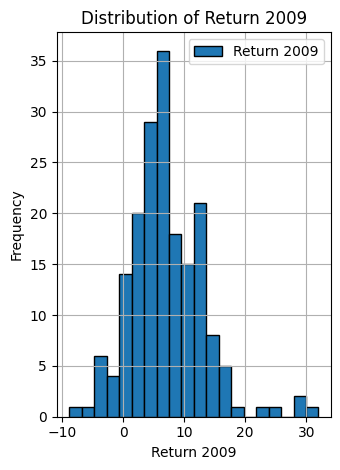

In [50]:
plt.subplot(1, 2, 2)
plt.hist(df['Return 2009'], bins=20, edgecolor='black', label='Return 2009')
plt.xlabel('Return 2009')
plt.ylabel('Frequency')
plt.title('Distribution of Return 2009')
plt.grid(True)

plt.legend()  # Add legend for both histograms
plt.tight_layout()
plt.show()

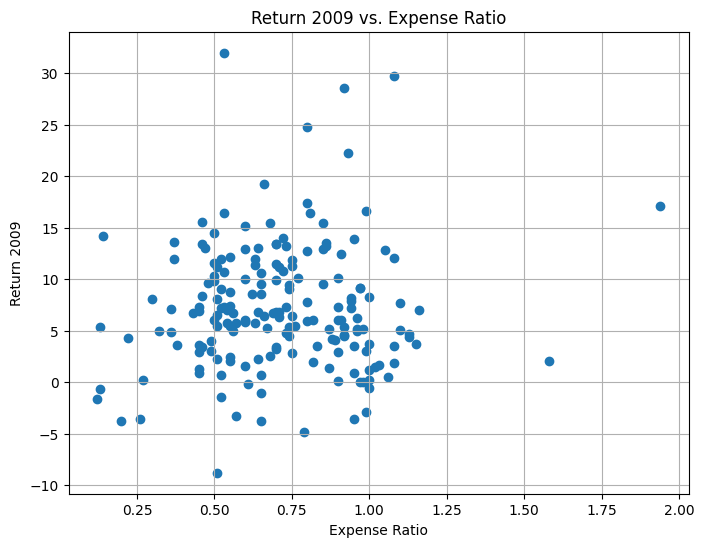

In [51]:
# b) Relationship between Return and Expense Ratio (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(df['Expense Ratio'], df['Return 2009'])
plt.xlabel('Expense Ratio')
plt.ylabel('Return 2009')
plt.title('Return 2009 vs. Expense Ratio')
plt.grid(True)
plt.show()

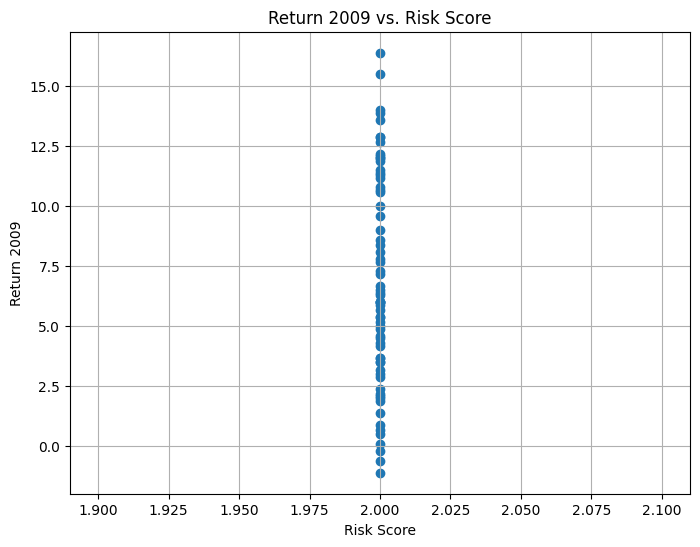

In [20]:
# c) Relationship between Risk and Return (scatter plot)
plt.figure(figsize=(8, 6))
risk_map = {'Below Average': 1, 'Average': 2, 'Above Average': 3}
df['Risk Score'] = df['Risk'].map(risk_map)  # Convert risk bins to numerical scores
plt.scatter(df['Risk Score'], df['Return 2009'])
plt.xlabel('Risk Score')
plt.ylabel('Return 2009')
plt.title('Return 2009 vs. Risk Score')
plt.grid(True)
plt.show()

In [21]:
# 3. Identify patterns and relationships (compare groups)

# Group by Risk
risk_groups = df.groupby('Risk')
print("Average Return by Risk:")
print(risk_groups['Return 2009'].mean())  # Calculate average return for each risk bin

# Explore correlations (example using pandas corr())
correlation = df[['Return 2009', 'Expense Ratio']].corr()
print("Correlation Matrix:")
print(correlation)  # Shows correlation coefficients between variables

Average Return by Risk:
Risk
Above average    8.313559
Average          6.871014
Below average    6.314286
Name: Return 2009, dtype: float64
Correlation Matrix:
               Return 2009  Expense Ratio
Return 2009       1.000000       0.070509
Expense Ratio     0.070509       1.000000


Mean Return 2009: 7.164130434782609
Median Return 2009: 6.4
Standard Deviation: 6.090843822878491


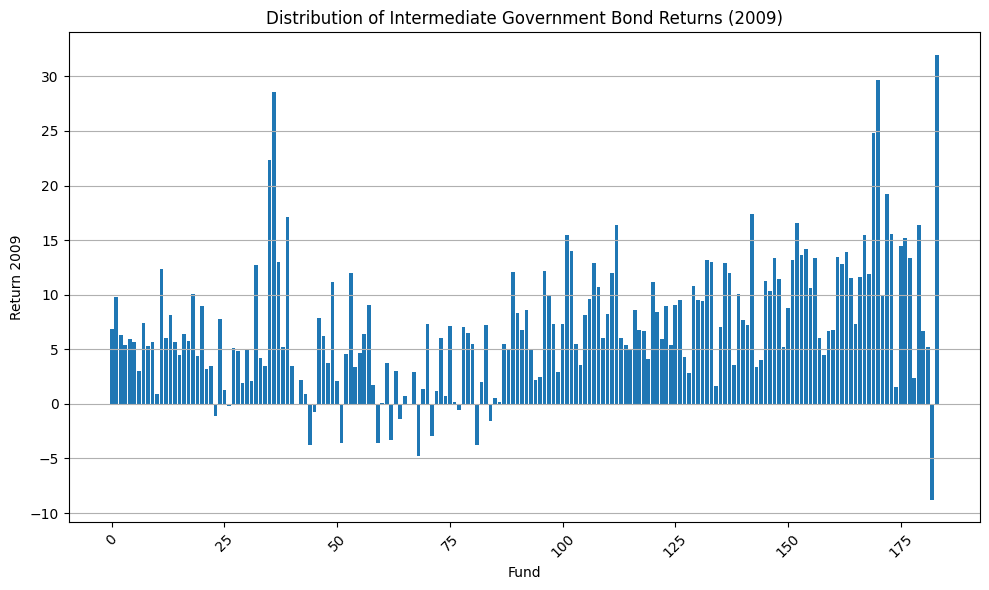

In [23]:
# Descriptive statistics
print("Mean Return 2009:", df['Return 2009'].mean())
print("Median Return 2009:", df['Return 2009'].median())
print("Standard Deviation:", df['Return 2009'].std())

# Data visualization (bar chart)
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Return 2009'])
plt.xlabel("Fund")
plt.ylabel("Return 2009")
plt.title("Distribution of Intermediate Government Bond Returns (2009)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [24]:
df

,Fund Number,Type,Assets,Fees,Expense Ratio,Return 2009,3-Year Return,5-Year Return,Risk,Bins,Midpoints,Risk Score
0,FN-1,Intermediate Government,7268.1,No,0.45,6.9,6.9,5.5,Below average,-10.01,-7.5,NaN
1,FN-2,Intermediate Government,475.1,No,0.50,9.8,7.5,6.1,Below average,-5.01,-2.5,NaN
2,FN-3,Intermediate Government,193.0,No,0.71,6.3,7.0,5.6,Average,-0.01,2.5,2.0
3,FN-4,Intermediate Government,18603.5,No,0.13,5.4,6.6,5.5,Average,4.99,7.5,2.0
4,FN-5,Intermediate Government,142.6,No,0.60,5.9,6.7,5.4,Average,9.99,12.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
179,FN-180,Short Term Corporate,33.8,No,0.53,16.4,0.7,1.8,Above average,NaN,NaN,NaN
180,FN-181,Short Term Corporate,249.8,Yes,0.43,6.7,-4.5,-1.5,Above average,NaN,NaN,NaN
181,FN-182,Short Term Corporate,52.9,No,0.87,5.2,-3.0,-0.7,Above average,NaN,NaN,NaN
182,FN-183,Short Term Corporate,39.7,No,0.51,-8.8,-13.8,-7.3,Above average,NaN,NaN,NaN


In [29]:


# Correlation analysis
correlation = df['Return 2009'].corr(df['Expense Ratio'])
print("Correlation between Return 2009 and Expense Ratio:", correlation)

# Optional: Scatter plot
plt.scatter(df['Expense Ratio'], df['Return 2009'])
plt.xlabel("Expense Ratio")
plt.ylabel("Return 2009")
plt.title("Return vs. Expense Ratio (2009)")
plt.grid(True)
plt.show()

TypeError: list indices must be integers or slices, not str